In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('sgemm_product.csv')

In [3]:
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [4]:
df2 = df.assign(RunMean = (df['Run1 (ms)'] + df['Run2 (ms)']  + df['Run3 (ms)']  + df['Run4 (ms)'] )/4)

In [5]:
df2.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),RunMean
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81,118.6625


In [6]:
import numpy as np

In [8]:
df2.shape

(241600, 19)

In [9]:
df2 = df2.drop(columns=['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'])

In [7]:
df2.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,RunMean
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,118.6625


In [10]:
X = df2.iloc[:,:14]

In [11]:
X.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0


In [12]:
y = df2['RunMean']

In [14]:
y = np.log(y)
y_mean = y.mean()
y_sd = y.std()
y = (y-y_mean)/y_sd

In [294]:
dct_LRtrain = {}
dct_LRtest = {}
for lr in [0.01,0.03,0.003,0.001,0.0003,0.0001]:   
    weights = np.zeros(n_features)
    bias = 0
    dct_LRtrain['LRtrain_%s' % lr] = []
    dct_LRtest['LRtest_%s' % lr] = []
    for i in range(0,3000):
        y_pred = np.dot(X_train, weights) + bias

        dw = (1/n_samples)*np.dot(X_train.T,(y_pred-y_train))
        db = (1/n_samples)*np.sum(y_pred-y_train)

        weights = weights - lr*dw
        bias = bias - lr*db
        y_pred_final = np.dot(X_test, weights) + bias
        MSE_train = np.mean((y_pred-y_train)**2)
        MSE_test = np.mean((y_pred_final-y_test)**2)
        dct_LRtrain['LRtrain_%s' % lr].append(MSE_train)
        dct_LRtest['LRtest_%s' % lr].append(MSE_test)
    y_pred_final = np.dot(X_test, weights) + bias
    MSE_train = np.mean((y_pred-y_train)**2)
    MSE = np.mean((y_pred_final-y_test)**2)
    print('For Learning Rate ' + str(lr) +' MSE is: ' +  str(MSE))
    print('For Learning Rate ' + str(lr) +' MSE_train is: ' +  str(MSE_train))

For Learning Rate 0.01 MSE is: 0.4394959464629183
For Learning Rate 0.01 MSE_train is: 0.4383353300108259
For Learning Rate 0.03 MSE is: 0.4394850497107393
For Learning Rate 0.03 MSE_train is: 0.43832926492934426
For Learning Rate 0.003 MSE is: 0.440458655074863
For Learning Rate 0.003 MSE_train is: 0.43922055154121414
For Learning Rate 0.001 MSE is: 0.4557994080905718
For Learning Rate 0.001 MSE_train is: 0.45428908024348397
For Learning Rate 0.0003 MSE is: 0.5782830020242469
For Learning Rate 0.0003 MSE_train is: 0.5759523727883438
For Learning Rate 0.0001 MSE is: 0.7722279641971869
For Learning Rate 0.0001 MSE_train is: 0.7691547299922609


In [98]:
dct_LRtrain = {}
dct_LRtest = {}
for lr in [0.01]:   
    weights = np.zeros(n_features)
    bias = 0
    dct_LRtrain['LRtrain_%s' % lr] = []
    dct_LRtest['LRtest_%s' % lr] = []
    dw_l=[]
    for i in range(0,10000):
        y_pred = np.dot(X_train, weights) + bias

        dw = (1/n_samples)*np.dot(X_train.T,(y_pred-y_train))
        db = (1/n_samples)*np.sum(y_pred-y_train)
        dw_l.append(dw.sum())

        weights = weights - lr*dw
        bias = bias - lr*db
        y_pred_final = np.dot(X_test, weights) + bias
        MSE_train = np.mean((y_pred-y_train)**2)
        MSE_test = np.mean((y_pred_final-y_test)**2)
        dct_LRtrain['LRtrain_%s' % lr].append(MSE_train)
        dct_LRtest['LRtest_%s' % lr].append(MSE_test)
    y_pred_final = np.dot(X_test, weights) + bias
    MSE_train = np.mean((y_pred-y_train)**2)
    MSE = np.mean((y_pred_final-y_test)**2)
    print('For Learning Rate ' + str(lr) +' MSE is: ' +  str(MSE))
    print('For Learning Rate ' + str(lr) +' MSE_train is: ' +  str(MSE_train))

For Learning Rate 0.01 MSE is: 0.4394850468666247
For Learning Rate 0.01 MSE_train is: 0.43832926492507723


In [112]:
len(['SB','SA','MWG','NWG','KWG','MDIMC','STRN','NDIMC','MDIMA','NDIMB'])

10

In [111]:
print(weights)
list(X)
#wei_feature = pd.DataFrame('X')
pd.DataFrame({'LST': list(X), 'IMG': weights}, columns=[list(X), weights])

[-0.39669839 -0.38145861 -0.16792691 -0.11665232 -0.04145447 -0.04098959
 -0.01520102 -0.01508544 -0.01137225 -0.0018882   0.00225441  0.08686338
  0.39684565  0.5023265 ]


,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB
,-0.396698,-0.381459,-0.167927,-0.116652,-0.041454,-0.040990,-0.015201,-0.015085,-0.011372,-0.001888,0.002254,0.086863,0.396846,0.502326


In [91]:
w = (np.diff(dw_l)> 0.0001)
w = list(w)
w.index(False)

225

In [54]:
w = (np.diff(dw_l)> 0.0001)
w = list(w)
w.index(False)

225

In [55]:
w = (np.diff(dw_l)> 0.00001)
w = list(w)
w.index(False)

246

In [59]:
w = (np.diff(dw_l)> 0.000001)
w = list(w)
w.index(False)

248

In [93]:
dct_LRtest['LRtest_0.01'][:248]

[0.9918364067928367,
 0.9816550366662967,
 0.9717013630544971,
 0.9619697058971733,
 0.9524545345089561,
 0.9431504635524739,
 0.9340522491214835,
 0.9251547849309862,
 0.9164530986113875,
 0.9079423481038181,
 0.8996178181538396,
 0.8914749169008117,
 0.883509172560295,
 0.8757162301969162,
 0.868091848585212,
 0.8606318971560268,
 0.8533323530261052,
 0.8461892981085987,
 0.8391989163022517,
 0.8323574907571071,
 0.8256614012146288,
 0.8191071214201913,
 0.8126912166059517,
 0.8064103410421688,
 0.8002612356550876,
 0.7942407257095655,
 0.7883457185546584,
 0.7825732014304428,
 0.77692023933439,
 0.7713839729456616,
 0.7659616166057376,
 0.7606504563538301,
 0.7554478480155858,
 0.7503512153436115,
 0.7453580482084058,
 0.7404659008383184,
 0.7356723901071897,
 0.7309751938683688,
 0.726372049333841,
 0.7218607514972274,
 0.7174391515994598,
 0.7131051556359618,
 0.7088567229042014,
 0.7046918645905136,
 0.7006086423951164,
 0.696605167194279,
 0.692679597738627,
 0.6888301393865983,

In [81]:
LRTrain_dot000001 = dct_LRtrain['LRtrain_0.01'].copy()
LRTrain_dot000001 = LRTrain_dot000001[:248]

len(dct_LRtrain['LRtrain_0.01'])
for i in range(249,10001):
    x = 0.46374856290302785
    LRTrain_dot000001.append(x)
    

In [88]:
LRTrain_dot001 = dct_LRtrain['LRtrain_0.01'].copy()
LRTrain_dot001 = LRTrain_dot001[:140]

len(dct_LRtrain['LRtrain_0.01'])
for i in range(141,10001):
    x = 0.5141980115674503
    LRTrain_dot001.append(x)

In [94]:
LRTest_dot000001 = dct_LRtest['LRtest_0.01'].copy()
LRTest_dot000001 = LRTest_dot000001[:248]

len(dct_LRtest['LRtest_0.01'])
for i in range(249,10001):
    x = 0.46513943808366076
    LRTest_dot000001.append(x)

In [ ]:
LRTrain_dot000001 = dct_LRtrain['LRtrain_0.01'].copy()
LRTrain_dot000001 = LRTrain_dot000001[:248]

len(dct_LRtrain['LRtrain_0.01'])
for i in range(249,10001):
    x = 0.46374856290302785
    LRTrain_dot000001.append(x)

In [ ]:
cost

In [15]:
Xnp = X.to_numpy()

In [16]:
ynp = y.to_numpy()

In [17]:
Xnp

array([[ 16,  16,  16, ...,   0,   0,   0],
       [ 16,  16,  16, ...,   0,   0,   1],
       [ 16,  16,  16, ...,   0,   1,   0],
       ...,
       [128, 128,  32, ...,   1,   0,   1],
       [128, 128,  32, ...,   1,   1,   0],
       [128, 128,  32, ...,   1,   1,   1]], dtype=int64)

In [18]:
ynp

array([ 0.1184787 , -0.22804996, -0.20735257, ..., -0.94207388,
       -1.12963911, -1.54438644])

In [19]:
from sklearn.preprocessing import StandardScaler
X.iloc[:,:10] = StandardScaler().fit_transform(X.iloc[:,:10])

In [21]:
X.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB
0,-1.516757,-1.516757,-1.210997,-0.753894,-0.753894,-0.998054,-0.998054,-1.0,-0.741449,-0.741449,0,0,0,0
1,-1.516757,-1.516757,-1.210997,-0.753894,-0.753894,-0.998054,-0.998054,-1.0,-0.741449,-0.741449,0,0,0,1
2,-1.516757,-1.516757,-1.210997,-0.753894,-0.753894,-0.998054,-0.998054,-1.0,-0.741449,-0.741449,0,0,1,0
3,-1.516757,-1.516757,-1.210997,-0.753894,-0.753894,-0.998054,-0.998054,-1.0,-0.741449,-0.741449,0,0,1,1
4,-1.516757,-1.516757,-1.210997,-0.753894,-0.753894,-0.998054,-0.998054,-1.0,-0.741449,-0.741449,0,1,0,0


In [17]:
y_mean = y.mean()


In [18]:
y_sd = y.std()

In [19]:
y = (y-y_mean)/y_sd

In [20]:
y

0        -0.274446
1        -0.376588
2        -0.371544
3        -0.355076
4        -0.268229
            ...   
241595   -0.541707
241596   -0.492303
241597   -0.494676
241598   -0.512866
241599   -0.541707
Name: RunMean, Length: 241600, dtype: float64

In [22]:
Xnp = X.as_matrix()

C:\Users\saitj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [23]:
ynp = y.as_matrix()

C:\Users\saitj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [20]:
Xnp

array([[-1.51675724, -1.51675724, -1.2109972 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.51675724, -1.51675724, -1.2109972 , ...,  0.        ,
         0.        ,  1.        ],
       [-1.51675724, -1.51675724, -1.2109972 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.12045227,  1.12045227,  0.82576574, ...,  1.        ,
         0.        ,  1.        ],
       [ 1.12045227,  1.12045227,  0.82576574, ...,  1.        ,
         1.        ,  0.        ],
       [ 1.12045227,  1.12045227,  0.82576574, ...,  1.        ,
         1.        ,  1.        ]])

In [25]:
Xnp.shape

(241600, 14)

In [24]:
ynp.shape

(241600,)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xnp, ynp, test_size=0.4, random_state=42)

In [27]:
n_samples, n_features = X_train.shape

In [28]:
weights = np.zeros(n_features)

In [33]:
weights = np.zeros(n_features)

bias = 0

In [117]:
y_pred_final = np.dot(X_test, weights) + bias
MSE = np.mean((y_pred_final-y_test)**2)
print('For Learning Rate ' + str(lr) +' MSE is: ' +  str(MSE))

For Learning Rate 0.01 MSE is: 0.5980702467117939


In [57]:
bias = 0

In [99]:
y_pred_final = np.dot(X_test, weights) + bias

In [100]:
weights

array([ 1.52403729e+27,  5.83686880e+25, -1.12692122e+27,  8.51849482e+26,
        3.56084702e+26, -2.89397289e+25,  1.22250286e+27, -5.75386825e+26,
        7.47853991e+26, -3.80781132e+26, -5.48239446e+29, -5.49198045e+29,
       -5.47024891e+29, -5.47412651e+29])

In [101]:
y_test

array([-0.31761194,  0.09114043, -0.41061529, ...,  1.72662446,
        0.12960143, -0.2993611 ])

In [102]:
MSE = np.mean((y_pred_final-y_test)**2)

In [103]:
MSE

3.2300390231450075e+59

In [61]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [62]:
y_pred1 = reg.predict(X_test)

In [63]:
MSE = np.mean((y_pred1-y_test)**2)

In [64]:
MSE

0.4394850455656185

In [42]:
dct['lst_%s' % lr] = []

{'lst_0.01': None}

In [58]:
dct.keys()

dict_keys(['lst_10', 'lst_1', 'lst_0.5', 'lst_0.25', 'lst_0.1', 'lst_0.01', 'lst_0.001', 'lst_0.0001'])

In [306]:
iterations = []
for i in range (0,3000):
    iterations.append(i)

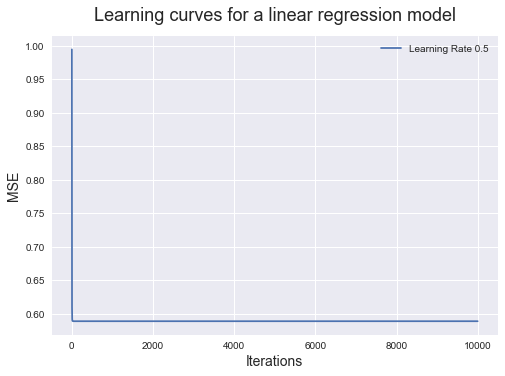

In [81]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
#plt.plot(iterations, dct['lst_10'], label = 'Learning Rate 10')
#plt.plot(iterations, dct['lst_1'], label = 'Learning Rate 1')
plt.plot(iterations, dct['lst_0.5'], label = 'Learning Rate 0.5')
#plt.plot(iterations, dct['lst_0.25'], label = 'Learning Rate 0.25')
#plt.plot(iterations, dct['lst_0.1'], label = 'Learning Rate 0.1')
#plt.plot(iterations, dct['lst_0.01'], label = 'Learning Rate 0.01')
#plt.plot(iterations, dct['lst_0.001'], label = 'Learning Rate 0.001')
#plt.plot(iterations, dct['lst_0.0001'], label = 'Learning Rate 0.0001')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Iterations', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()

In [78]:
len(iterations)

10000

In [80]:
dct['lst_10']

[0.9947942466512316,
 34.82353734095817,
 4942.36362136577,
 790189.5564172394,
 129888692.59245129,
 22016750342.916054,
 3958749604462.424,
 796651319154631.8,
 1.9143479383221734e+17,
 5.637670230952172e+19,
 1.9527019327229927e+22,
 7.440415442094452e+24,
 2.968944904348136e+27,
 1.2088876562774963e+30,
 4.9642262283316674e+32,
 2.0456730673536388e+35,
 8.441986533927273e+37,
 3.485854241679426e+40,
 1.4397237397114441e+43,
 5.946926407644997e+45,
 2.4565405063665546e+48,
 1.0147586037043159e+51,
 4.191839526728681e+53,
 1.731601059316435e+56,
 7.1530551657726e+58,
 2.954850621030208e+61,
 1.2206174675431394e+64,
 5.0422418195039425e+66,
 2.082896911593915e+69,
 8.604227581679246e+71,
 3.55431573991958e+74,
 1.4682503798123593e+77,
 6.065187614530789e+79,
 2.5054650980336765e+82,
 1.0349812335164372e+85,
 4.275398426694207e+87,
 1.766122043156797e+90,
 7.295664076355843e+92,
 3.013761960654189e+95,
 1.2449533120566741e+98,
 5.1427709601401805e+100,
 2.124424497877926e+103,
 8.77577

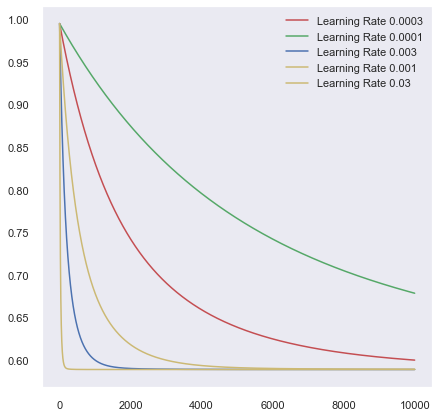

In [118]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 1, figsize=(7, 7))
axes.grid()
#axes.plot(iterations, dct['lst_0.5'], 'o-', color="g",
#                 label = 'Learning Rate 0.5')
axes.plot(iterations, dct['lst_0.0003'], color="r",
                 label = 'Learning Rate 0.0003')
axes.plot(iterations, dct['lst_0.0001'], color="g",
                 label = 'Learning Rate 0.0001')
axes.plot(iterations, dct['lst_0.003'], color="b",
                 label = 'Learning Rate 0.003')
axes.plot(iterations, dct['lst_0.001'], color="y",
                 label = 'Learning Rate 0.001')
axes.plot(iterations, dct['lst_0.03'], color="y",
                 label = 'Learning Rate 0.03')
#axes.plot(iterations, dct['lst_1'], color="y",
#                 label = 'Learning Rate 0.25')
axes.legend(loc="best")
plt.show()

In [305]:
len(dct_LRtrain['LRtrain_0.0003'])

3000

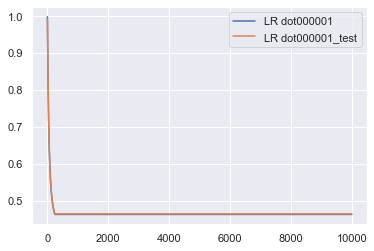

In [97]:
iterations = []
for i in range (1,10001):
    iterations.append(i)

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
#ax = sns.lineplot(x=iterations, y=dct_LRtrain['LRtrain_0.0003'],legend='brief', label='LR 0.0003')
#ax = sns.lineplot(x=iterations, y=dct_LRtrain['LRtrain_0.0001'],legend='brief', label='LR 0.0001')
#ax = sns.lineplot(x=iterations, y=dct_LRtrain['LRtrain_0.003'],legend='brief', label='LR 0.003')
#ax = sns.lineplot(x=iterations, y=dct_LRtrain['LRtrain_0.001'],legend='brief', label='LR 0.001')
#ax = sns.lineplot(x=iterations, y=dct_LRtrain['LRtrain_0.03'],legend='brief', label='LR 0.03')
#ax = sns.lineplot(x=iterations, y=dct_LRtrain['LRtrain_0.01'],legend='brief', label='LR 0.01')
ax = sns.lineplot(x=iterations, y=LRTrain_dot000001,legend='brief', label='LR dot000001')
#ax = sns.lineplot(x=iterations, y=LRTrain_dot001,legend='brief', label='LR dot001')
ax = sns.lineplot(x=iterations, y=LRTest_dot000001,legend='brief', label='LR dot000001_test')


plt.show()

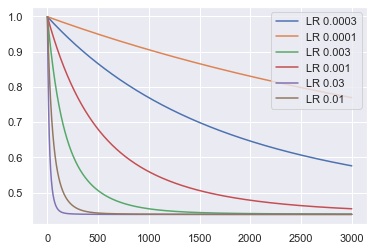

In [307]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x=iterations, y=dct_LRtrain['LRtrain_0.0003'],legend='brief', label='LR 0.0003')
ax = sns.lineplot(x=iterations, y=dct_LRtrain['LRtrain_0.0001'],legend='brief', label='LR 0.0001')
ax = sns.lineplot(x=iterations, y=dct_LRtrain['LRtrain_0.003'],legend='brief', label='LR 0.003')
ax = sns.lineplot(x=iterations, y=dct_LRtrain['LRtrain_0.001'],legend='brief', label='LR 0.001')
ax = sns.lineplot(x=iterations, y=dct_LRtrain['LRtrain_0.03'],legend='brief', label='LR 0.03')
ax = sns.lineplot(x=iterations, y=dct_LRtrain['LRtrain_0.01'],legend='brief', label='LR 0.01')
plt.show()

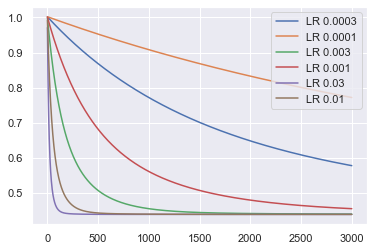

In [308]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x=iterations, y=dct_LRtest['LRtest_0.0003'],legend='brief', label='LR 0.0003')
ax = sns.lineplot(x=iterations, y=dct_LRtest['LRtest_0.0001'],legend='brief', label='LR 0.0001')
ax = sns.lineplot(x=iterations, y=dct_LRtest['LRtest_0.003'],legend='brief', label='LR 0.003')
ax = sns.lineplot(x=iterations, y=dct_LRtest['LRtest_0.001'],legend='brief', label='LR 0.001')
ax = sns.lineplot(x=iterations, y=dct_LRtest['LRtest_0.03'],legend='brief', label='LR 0.03')
ax = sns.lineplot(x=iterations, y=dct_LRtest['LRtest_0.01'],legend='brief', label='LR 0.01')


In [ ]:
###logistic

In [25]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [75]:
dct_LOG_LRtrain = {}
dct_LOG_LRtest = {}
y_train = np.dot(X_train, weights) + bias
y_pred_train = sigmoid(y_train)

y_test = np.dot(X_test, weights) + bias
y_pred_test = sigmoid(y_test)
for lr in [1]:
    dct_LOG_LRtrain['LRtrain_%s' % lr] = []
    dct_LOG_LRtest['LRtest_%s' % lr] = []
    for i in range(0,100):
        #y_train = np.dot(X_train, weights) + bias
        #y_pred_train = sigmoid(y_train)
        
        dc = (1/n_samples)*np.dot(X_train.T,(y_pred_train-y_train_class))
        db = (1/)
        weights = weights - lr*dc
        y_train_new = np.dot(X_train, weights) + 
        bias
        y_train_pred_new = sigmoid(y_train_new)
        correct_train = (y_train_class == y_train_pred_new)
        accuracy_train = correct_train.sum() / correct_train.size

        #dw = (1/n_samples)*np.dot(X_train.T,(y_pred-y_train))
        #db = (1/n_samples)*np.sum(y_pred-y_train)

        #weights = weights - lr*dw
        #bias = bias - lr*db
        
        y_test_new = np.dot(X_test, weights) + bias
        y_test_pred_new = sigmoid(y_test_new)
        correct_test = (y_test_class == y_test_pred_new)
        accuracy_test = correct_test.sum() / correct_test.size
        
        
        #MSE_train = np.mean((y_pred-y_train)**2)
        #MSE_test = np.mean((y_pred_final-y_test)**2)
        dct_LOG_LRtrain['LRtrain_%s' % lr].append(accuracy_train)
        dct_LOG_LRtest['LRtest_%s' % lr].append(accuracy_test)
    #y_pred_final = np.dot(X_test, weights) + bias
    #MSE_train = np.mean((y_pred-y_train)**2)
    #MSE = np.mean((y_pred_final-y_test)**2)
    #print('For Learning Rate ' + str(lr) +' MSE is: ' +  str(MSE))
    #print('For Learning Rate ' + str(lr) +' MSE_train is: ' +  str(MSE_train))

In [76]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x=iterations, y=dct_LOG_LRtest['LRtest_1'],legend='brief', label='LR 0.0003')
ax = sns.lineplot(x=iterations, y=dct_LOG_LRtest['LRtest_0.01'],legend='brief', label='LR 0.0001')
ax = sns.lineplot(x=iterations, y=dct_LOG_LRtest['LRtest_0.001'],legend='brief', label='LR 0.003')
ax = sns.lineplot(x=iterations, y=dct_LOG_LRtest['LRtest_0.0001'],legend='brief', label='LR 0.001')
ax = sns.lineplot(x=iterations, y=dct_LOG_LRtest['LRtest_0.00001'],legend='brief', label='LR 0.03')

ValueError: arrays must all be same length

In [ ]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x=iterations, y=dct_LOG_LRtrain['LRtrain_1'],legend='brief', label='LR 0.0003')
ax = sns.lineplot(x=iterations, y=dct_LOG_LRtrain['LRtrain_0.01'],legend='brief', label='LR 0.0001')
ax = sns.lineplot(x=iterations, y=dct_LOG_LRtrain['LRtrain_0.001'],legend='brief', label='LR 0.003')
ax = sns.lineplot(x=iterations, y=dct_LOG_LRtrain['LRtrain_0.0001'],legend='brief', label='LR 0.001')
ax = sns.lineplot(x=iterations, y=dct_LOG_LRtrain['LRtrain_0.00001'],legend='brief', label='LR 0.03')

In [29]:
y.describe()

count    2.416000e+05
mean     3.787870e-15
std      1.000000e+00
min     -5.539101e-01
25%     -4.797407e-01
50%     -4.007644e-01
75%      2.933028e-02
max      8.471686e+00
Name: RunMean, dtype: float64

In [44]:
df2['RunMean'].describe()

count    241600.000000
mean        217.571953
std         368.750161
min          13.317500
25%          40.667500
50%          69.790000
75%         228.387500
max        3341.507500
Name: RunMean, dtype: float64

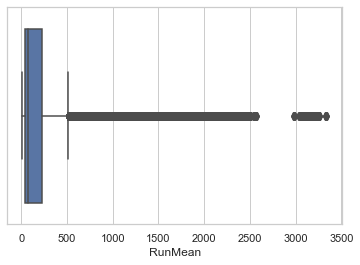

In [290]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=df2['RunMean'])

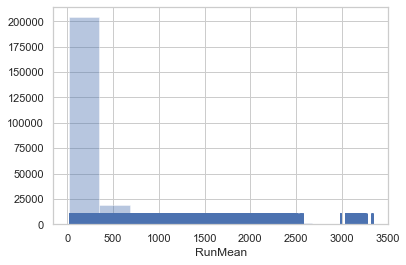

In [48]:

sns.distplot(df2['RunMean'], bins=10, kde=False, rug=True);

In [ ]:
#anything above 69.790 is considered different class. Since there are outliers, we consider median instead of mean

In [49]:
class_list = []
for i in df2['RunMean']:
    if i > 69.70:
        x = 1
        class_list.append(x)
    else:
        x = 0
        class_list.append(x)

In [30]:
median = 69.79
cut_off = (median - y_mean)/(y_sd)
cut_off

-0.40076444381591425

In [60]:
sigmoid(-0.40076444381591425)

0.4011286879101227

In [26]:
y_train_class = []
for i in y_train:
    if i > -0.40076444381591425:
        x = 1
        y_train_class.append(x)
    else:
        x = 0
        y_train_class.append(x)

y_test_class = []
for i in y_test:
    if i > -0.40076444381591425:
        x = 1
        y_test_class.append(x)
    else:
        x = 0
        y_test_class.append(x)

In [26]:
weights

NameError: name 'weights' is not defined

In [58]:
bias

-0.0068802773536359085

In [60]:
class_list
y_train_class, y_test_class = train_test_split(class_list, test_size=0.4, random_state=42)

In [61]:
y_train_class

[1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,


In [27]:
sigmoid(-0.40076444381591425)

NameError: name 'sigmoid' is not defined

In [39]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
LOG_LRtrain = {}

LOG_LRtest = {}
db = {}
for lr in [1,0.1]:   
    weights = np.zeros(n_features)
    bias = 0
    LOG_LRtrain['LRtrain_%s' % lr] = []
    LOG_LRtest['LRtest_%s' % lr] = []
    for i in range(0,10):
        lin_y_train = np.dot(X_train, weights) + bias
        y_train_pred = sigmoid(lin_y_train)

        dw = (1/n_samples)*np.dot(X_train.T,(y_train_pred-y_train_class))
        db = (1/n_samples)*np.sum(y_train_pred-y_train_class)

        weights = weights - lr*dw
        bias = bias - lr*db
        
        lin_y_test = np.dot(X_test, weights) + bias
        y_test_pred = sigmoid(lin_y_test)
        
        accuracy_test = sum(i > 0.4011286879101227 for i in y_test_pred) / len(y_test_pred)
        #print(sum(i > 0.4 for i in y_test_pred))
        
        lin_y_train = np.dot(X_train, weights) + bias
        y_train_pred = sigmoid(lin_y_train)
        
        accuracy_train = sum(i > 0.4011286879101227 for i in y_train_pred) / len(y_train_pred)
        print(i)
        
        #print(len(y_train_pred_class))
        #print(len(y_train_class))
        
        #correct_train = (y_train_class == y_train_pred_class)
        #accuracy_train = correct_train.sum() / correct_train.size
        
        #MSE_train = np.mean((y_pred-y_train)**2)
        #MSE_test = np.mean((y_pred_final-y_test)**2)
        LOG_LRtrain['LRtrain_%s' % lr].append(accuracy_train)
        LOG_LRtest['LRtest_%s' % lr].append(accuracy_test)
    print(accuracy_test)
    print(accuracy_train)

0
1
2
3
4
5
6
7
8
9
0.5954056291390728
0.5943018763796909
0
1
2
3
4
5
6
7
8
9
0.9249068708609272
0.9252000551876379


In [41]:
for i in y_train_pred:
            if i > 0.4011286879101227:
                x = 1
                y_train_pred_class.append(x)
            else:
                x = 0
                y_train_pred_class.append(x)
                
 for i in y_test_pred:
            if i > 0.4011286879101227:
                x = 1
                y_test_pred_class.append(x)
            else:
                x = 0
                y_test_pred_class.append(x)

{'LRtest_0.01': []}

In [69]:
 sum(i > 0.4011286879101227 for i in y_test_pred)

89746

In [73]:
LOG_LRtrain.keys()

dict_keys(['LRtrain_100', 'LRtrain_10', 'LRtrain_1', 'LRtrain_0.01', 'LRtrain_0.001'])

In [60]:
iterations = []
for i in range (0,len(LOG_LRtest['LRtest_0.1'])):
    iterations.append(i)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
#ax = sns.lineplot(x=iterations, y=LOG_LRtest['LRtest_100'],legend='brief', label='LR 100')
ax = sns.lineplot(x=iterations, y=LOG_LRtest['LRtest_0.01'],legend='brief', label='LR 1')
#ax = sns.lineplot(x=iterations, y=LOG_LRtest['LRtest_1'],legend='brief', label='LR 1')
ax = sns.lineplot(x=iterations, y=LOG_LRtest['LRtest_0.1'],legend='brief', label='LR 0.1')
#ax = sns.lineplot(x=iterations, y=LOG_LRtest['LRtest_0.001'],legend='brief', label='LR 0.001')

KeyError: 'LRtest_0.01'

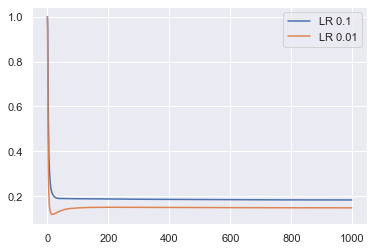

In [59]:
iterations = []
for i in range (0,len(LOG_LRtrain['LRtrain_0.1'])):
    iterations.append(i)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
#ax = sns.lineplot(x=iterations, y=LOG_LRtest['LRtest_100'],legend='brief', label='LR 100')
ax = sns.lineplot(x=iterations, y=LOG_LRtrain['LRtrain_0.1'],legend='brief', label='LR 0.1')
#ax = sns.lineplot(x=iterations, y=LOG_LRtest['LRtest_1'],legend='brief', label='LR 1')
ax = sns.lineplot(x=iterations, y=LOG_LRtrain['LRtrain_0.01'],legend='brief', label='LR 0.01')

In [ ]:
def sigmoid(X, weight):
    z = np.dot(X, weight)
    return 1 / (1 + np.exp(-z))

In [ ]:
cost = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
gradient_descent = np.dot(X.T, (h - y)) / y.shape[0]
weight = weight - learning_rate * gradient

In [41]:
len(X_train)

144960

In [61]:
 sum(i > 0.4011286879101227 for i in y_pred)

21457

In [292]:
X_10I = X[['MWG','NWG','MDIMC','NDIMC','VWM','VWN', 'SA','SB','KWI','STRM']]
X_10R = X[['MWG','NWG','MDIMC','NDIMC','KWI','VWM','VWN','STRM','STRN','SA']]

y_mean = y.mean()
y_sd = y.std()
y = (y-y_mean)/y_sd
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
        
n_samples, n_features = X_train.shape

In [293]:
dct_LRtrain = {}
dct_LRtest = {}
for lr in [0.03]:   
    weights = np.zeros(n_features)
    bias = 0
    dct_LRtrain['LRtrain_%s' % lr] = []
    dct_LRtest['LRtest_%s' % lr] = []
    for i in range(0,10000):
        y_pred = np.dot(X_train, weights) + bias

        dw = (1/n_samples)*np.dot(X_train.T,(y_pred-y_train))
        db = (1/n_samples)*np.sum(y_pred-y_train)

        weights = weights - lr*dw
        bias = bias - lr*db
        y_pred_final = np.dot(X_test, weights) + bias
        MSE_train = np.mean((y_pred-y_train)**2)
        MSE_test = np.mean((y_pred_final-y_test)**2)
        dct_LRtrain['LRtrain_%s' % lr].append(MSE_train)
        dct_LRtest['LRtest_%s' % lr].append(MSE_test)
    y_pred_final = np.dot(X_test, weights) + bias
    MSE_train = np.mean((y_pred-y_train)**2)
    MSE = np.mean((y_pred_final-y_test)**2)
    print('For Learning Rate ' + str(lr) +' MSE is: ' +  str(MSE))
    print('For Learning Rate ' + str(lr) +' MSE_train is: ' +  str(MSE_train))

For Learning Rate 0.03 MSE is: 0.43948504556561474
For Learning Rate 0.03 MSE_train is: 0.4383292649246135


In [291]:
weights

array([ 0.5023265 ,  0.39684564,  0.08686338, -0.39669839, -0.38145861,
        0.00225441, -0.0018882 , -0.01137225, -0.01508544, -0.04098959,
       -0.11665298, -0.01520169, -0.16792757, -0.04145513])

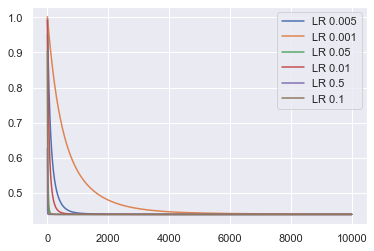

In [121]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x=iterations, y=dct_LRtest['LRtest_0.005'],legend='brief', label='LR 0.005')
ax = sns.lineplot(x=iterations, y=dct_LRtest['LRtest_0.001'],legend='brief', label='LR 0.001')
ax = sns.lineplot(x=iterations, y=dct_LRtest['LRtest_0.05'],legend='brief', label='LR 0.05')
ax = sns.lineplot(x=iterations, y=dct_LRtest['LRtest_0.01'],legend='brief', label='LR 0.01')
ax = sns.lineplot(x=iterations, y=dct_LRtest['LRtest_0.5'],legend='brief', label='LR 0.5')
ax = sns.lineplot(x=iterations, y=dct_LRtest['LRtest_0.1'],legend='brief', label='LR 0.1')
plt.show()

In [ ]:
dct_LRtest['LRtest_0.01']

In [310]:
dct_LRtrain = {}
dct_LRtest = {}

for ct in [0.03]:   
    weights = np.zeros(n_features)
    bias = 0
    dct_LRtrain['LRtrain_%s' % ct] = []
    dct_LRtest['LRtest_%s' % ct] = []
    dw_l = []
    for i in range(0,3000):
        lr = 0.03
        count = 0
        y_pred = np.dot(X_train, weights) + bias

        dw = (1/n_samples)*np.dot(X_train.T,(y_pred-y_train))
        db = (1/n_samples)*np.sum(y_pred-y_train)
        dw_l.append(dw.sum())
        weights = weights - lr*dw
        bias = bias - lr*db
        #if (i<=2):
            #weights = weights - lr*dw
            #bias = bias - lr*db
       # else:
            #while (abs(dw_l[i-1])-abs(dw_l[i]) > ct):
             #   weights = weights - lr*dw
             #   bias = bias - lr*db
             #   count = count + 1
              #  if (abs(dw_l[i-1])-abs(dw_l[i]) < ct):
              #       break
                
        
        y_pred_final = np.dot(X_test, weights) + bias
        MSE_train = np.mean((y_pred-y_train)**2)
        MSE_test = np.mean((y_pred_final-y_test)**2)
        dct_LRtrain['LRtrain_%s' % ct].append(MSE_train)
        dct_LRtest['LRtest_%s' % ct].append(MSE_test)
    y_pred_final = np.dot(X_test, weights) + bias
    MSE_train = np.mean((y_pred-y_train)**2)
    MSE = np.mean((y_pred_final-y_test)**2)
    print('For Learning Rate ' + str(lr) +' MSE is: ' +  str(MSE))
    print('For Learning Rate ' + str(lr) +' MSE_train is: ' +  str(MSE_train))
    #print(count)

For Learning Rate 0.03 MSE is: 0.4394850497107393
For Learning Rate 0.03 MSE_train is: 0.43832926492934426


In [301]:
bias


0.0015380917278391079

In [187]:
dw_l[800]-dw_l[801] > 0.00001

True

In [311]:
w = abs(np.diff(dw_l)) < 0.0000001
w = list(w)
w.index(True)
dct_LRtest['LRtest_0.03'][1839]

0.43948530651310175

In [312]:
w = abs(np.diff(dw_l)) < 0.000001
w = list(w)
w.index(True)
dct_LRtrain['LRtrain_0.03'][1268]

0.43833017671866004

In [313]:
w = abs(np.diff(dw_l)) < 0.00001
w = list(w)
w.index(True)
#dct_LRtrain['LRtrain_0.03'][1268]

81

In [314]:
w = abs(np.diff(dw_l)) < 0.000001
w = list(w)
w.index(True)
#dct_LRtest['LRtest_0.03'][1268]

1387

In [315]:
w = abs(np.diff(dw_l)) < 0.00001
w = list(w)
w.index(True)
#dct_LRtest['LRtest_0.01'][218]

81

In [316]:
w = abs(np.diff(dw_l)) < 0.0001
w = list(w)
w.index(True)
#dct_LRtest['LRtest_0.01'][204]

79

In [318]:
CT_dot0000001 = []
for i in range (0,3000):
    if i < 1839:
        CT_dot0000001.append(dct_LRtest['LRtest_0.03'][i])
    else:
        CT_dot0000001.append(dct_LRtest['LRtest_0.03'][1839])

CT_dot000001 = []
for i in range (0,3000):
    if i < 1268:
        CT_dot000001.append(dct_LRtest['LRtest_0.03'][i])
    else:
        CT_dot000001.append(dct_LRtest['LRtest_0.03'][1268])
        
CT_dot00001 = []
for i in range (0,3000):
    if i < 218:
        CT_dot00001.append(dct_LRtest['LRtest_0.03'][i])
    else:
        CT_dot00001.append(dct_LRtest['LRtest_0.03'][218])
        

iterations = []
for i in range (0,3000):
    iterations.append(i)

In [319]:
CT_dot0000001_train = []
for i in range (0,3000):
    if i < 1839:
        CT_dot0000001_train.append(dct_LRtest['LRtest_0.03'][i])
    else:
        CT_dot0000001_train.append(dct_LRtest['LRtest_0.03'][1839])

CT_dot000001_train = []
for i in range (0,3000):
    if i < 1268:
        CT_dot000001_train.append(dct_LRtest['LRtest_0.03'][i])
    else:
        CT_dot000001_train.append(dct_LRtest['LRtest_0.03'][1268])
        
CT_dot00001_train = []
for i in range (0,3000):
    if i < 218:
        CT_dot00001_train.append(dct_LRtest['LRtest_0.03'][i])
    else:
        CT_dot00001_train.append(dct_LRtest['LRtest_0.03'][218])
        

        
iterations = []
for i in range (0,3000):
    iterations.append(i)

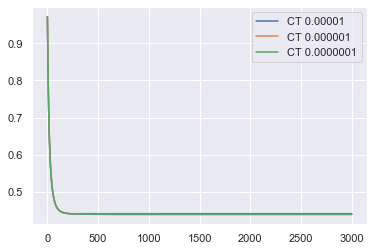

In [320]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

ax = sns.lineplot(x=iterations, y=CT_dot00001_train,legend='brief', label='CT 0.00001')
ax = sns.lineplot(x=iterations, y=CT_dot000001_train,legend='brief', label='CT 0.000001')
ax = sns.lineplot(x=iterations, y=CT_dot0000001_train,legend='brief', label='CT 0.0000001')
plt.show()

In [260]:
len(CT_dot0001)

10000

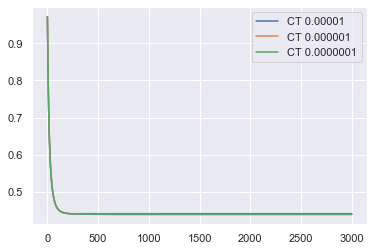

In [321]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

ax = sns.lineplot(x=iterations, y=CT_dot00001,legend='brief', label='CT 0.00001')
ax = sns.lineplot(x=iterations, y=CT_dot000001,legend='brief', label='CT 0.000001')
ax = sns.lineplot(x=iterations, y=CT_dot0000001,legend='brief', label='CT 0.0000001')
plt.show()

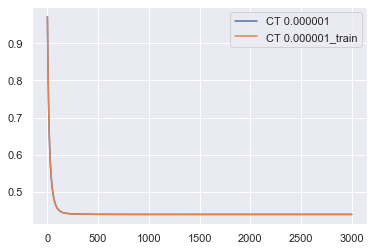

In [322]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

ax = sns.lineplot(x=iterations, y=CT_dot000001,legend='brief', label='CT 0.000001')
ax = sns.lineplot(x=iterations, y=CT_dot000001_train,legend='brief', label='CT 0.000001_train')

plt.show()

In [252]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x=iterations, y=dct_LRtrain['LRtrain_0.01'],legend='brief', label='LR 0.01')
ax = sns.lineplot(x=iterations, y=dct_LRtrain['LRtrain_0.03'],legend='brief', label='LR 0.03')
ax = sns.lineplot(x=iterations, y=dct_LRtrain['LRtrain_0.001'],legend='brief', label='LR 0.001')
ax = sns.lineplot(x=iterations, y=dct_LRtrain['LRtrain_0.003'],legend='brief', label='LR 0.003')
ax = sns.lineplot(x=iterations, y=dct_LRtrain['LRtrain_0.0001'],legend='brief', label='LR 0.0001')
ax = sns.lineplot(x=iterations, y=dct_LRtrain['LRtrain_0.0003'],legend='brief', label='LR 0.0003')
plt.show()

KeyError: 'LRtrain_0.01'

In [253]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x=iterations, y=dct_LRtest['LRtest_0.01'],legend='brief', label='LR 0.01')
ax = sns.lineplot(x=iterations, y=dct_LRtest['LRtest_0.03'],legend='brief', label='LR 0.03')
ax = sns.lineplot(x=iterations, y=dct_LRtest['LRtest_0.001'],legend='brief', label='LR 0.001')
ax = sns.lineplot(x=iterations, y=dct_LRtest['LRtest_0.003'],legend='brief', label='LR 0.003')
ax = sns.lineplot(x=iterations, y=dct_LRtest['LRtest_0.0001'],legend='brief', label='LR 0.0001')
ax = sns.lineplot(x=iterations, y=dct_LRtest['LRtest_0.0003'],legend='brief', label='LR 0.0003')
plt.show()

KeyError: 'LRtest_0.01'

In [ ]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x=iterations, y=CT_dot0001,legend='brief', label='CT 0.0001')
ax = sns.lineplot(x=iterations, y=CT_dot00001,legend='brief', label='CT 0.00001')
ax = sns.lineplot(x=iterations, y=CT_dot000001,legend='brief', label='LR 0.000001')
ax = sns.lineplot(x=iterations, y=CT_dot0000001,legend='brief', label='LR 0.0000001')
plt.show()

In [202]:
abs(np.diff(dw_l))

array([1.13569398e-02, 1.11854832e-02, 1.10164152e-02, 1.08497040e-02,
       1.06853181e-02, 1.05232263e-02, 1.03633979e-02, 1.02058027e-02,
       1.00504107e-02, 9.89719233e-03, 9.74611855e-03, 9.59716056e-03,
       9.45028997e-03, 9.30547875e-03, 9.16269925e-03, 9.02192417e-03,
       8.88312657e-03, 8.74627986e-03, 8.61135778e-03, 8.47833445e-03,
       8.34718428e-03, 8.21788205e-03, 8.09040285e-03, 7.96472211e-03,
       7.84081556e-03, 7.71865927e-03, 7.59822960e-03, 7.47950324e-03,
       7.36245717e-03, 7.24706868e-03, 7.13331534e-03, 7.02117505e-03,
       6.91062596e-03, 6.80164653e-03, 6.69421549e-03, 6.58831185e-03,
       6.48391492e-03, 6.38100424e-03, 6.27955966e-03, 6.17956125e-03,
       6.08098939e-03, 5.98382469e-03, 5.88804801e-03, 5.79364048e-03,
       5.70058347e-03, 5.60885859e-03, 5.51844770e-03, 5.42933290e-03,
       5.34149653e-03, 5.25492114e-03, 5.16958954e-03, 5.08548475e-03,
       5.00259002e-03, 4.92088881e-03, 4.84036482e-03, 4.76100194e-03,
      

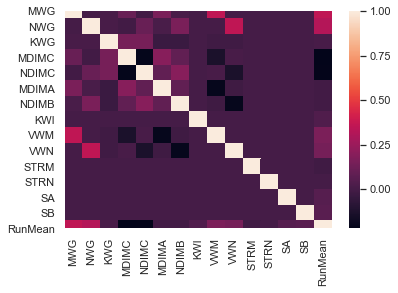

In [236]:
sns.heatmap(df2.corr())